In [115]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb


In [116]:

# Load the dataset
file_path = r'cybersecurity_attacks.csv'
pd.set_option('display.max_columns', None)
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [117]:
data.describe(include="all")

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.000000,40000.000000,40000,40000.000000,40000,40000,40000,20000,40000.000000,19933,40000,40000,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,NaN,NaN,3,NaN,2,3,40000,1,NaN,1,3,2,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,NaN,NaN,ICMP,NaN,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,NaN,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,NaN,NaN,13429,NaN,20237,13376,1,20000,NaN,19933,13428,20076,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,NaN,NaN,NaN,32970.356450,33150.868650,NaN,781.452725,NaN,NaN,NaN,NaN,50.113473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,18560.425604,18574.668842,NaN,416.044192,NaN,NaN,NaN,NaN,28.853598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1027.000000,1024.000000,NaN,64.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16850.750000,17094.750000,NaN,420.000000,NaN,NaN,NaN,NaN,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32856.000000,33004.500000,NaN,782.000000,NaN,NaN,NaN,NaN,50.345000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,48928.250000,49287.000000,NaN,1143.000000,NaN,NaN,NaN,NaN,75.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
data.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [119]:
data_columns = data.columns
for col in data_columns:
    print(f"Name of columns: {col}")
    print("Number of unique data is:",data[col].nunique())
    print("Value Count of the data is:\n",data[col].value_counts())
    print()
  

Name of columns: Timestamp
Number of unique data is: 39997
Value Count of the data is:
 Timestamp
2022-06-11 14:28:15    2
2022-06-06 12:12:43    2
2022-04-17 20:05:34    2
2023-05-30 06:33:58    1
2021-01-11 23:03:29    1
                      ..
2022-01-27 11:03:06    1
2020-10-23 03:26:01    1
2020-12-17 14:28:29    1
2022-06-23 07:20:25    1
2023-10-10 11:59:52    1
Name: count, Length: 39997, dtype: int64

Name of columns: Source IP Address
Number of unique data is: 40000
Value Count of the data is:
 Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
                  ..
8.73.26.79         1
15.232.18.232      1
71.157.156.214     1
200.15.203.154     1
14.102.21.108      1
Name: count, Length: 40000, dtype: int64

Name of columns: Destination IP Address
Number of unique data is: 40000
Value Count of the data is:
 Destination IP Address
84.9.164.252       1
131.248.231.186    1
48.157.39.218      1
112.135.140

## 2. Data Cleaning

In [120]:
missing_data = data.isnull().sum()
print(data.isnull().sum())
print("\nMissing percentage: ", ((missing_data/ len(data))*100))



Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Missing percentage:  Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.

In [121]:
# Handing missing data by filling it
data.fillna("No Data", inplace=True)
row_missing_data = data[data.isnull().any(axis=1)]
missing_data = data.isnull().sum()
print(row_missing_data)
missing_data # to check there is missing data


Empty DataFrame
Columns: [Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Protocol, Packet Length, Packet Type, Traffic Type, Payload Data, Malware Indicators, Anomaly Scores, Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, User Information, Device Information, Network Segment, Geo-location Data, Proxy Information, Firewall Logs, IDS/IPS Alerts, Log Source]
Index: []


Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [122]:
data.info()
# It shows that Timestamps need to change to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [123]:

# Convert timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extracting time-based features
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year

# Remove duplicate records
data = data.drop_duplicates()
data.head(3)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,No Data,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Data,Log Data,No Data,Firewall,7,2,8,2020
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,11,2022


In [124]:
# Download filled data
data.to_csv('filled_cyber_security.csv')

## 3. Anomaly Detection Using IQR

Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], dtype='object')


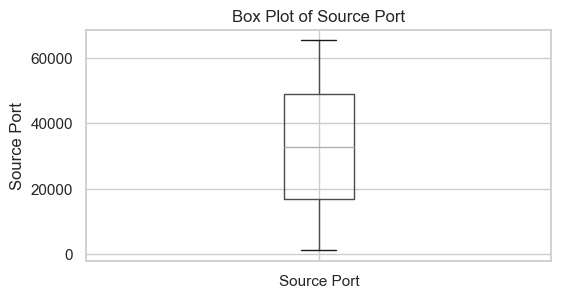

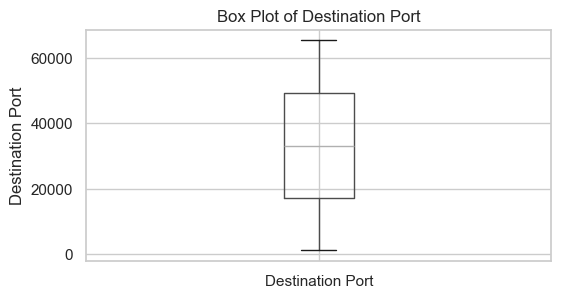

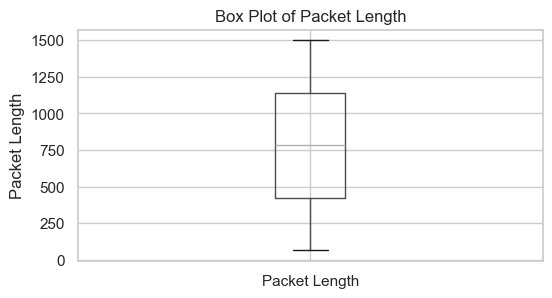

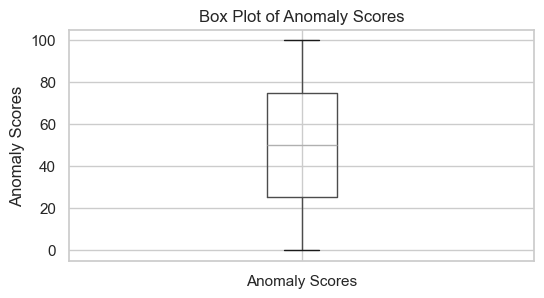

{'Source Port': 0, 'Destination Port': 0, 'Packet Length': 0, 'Anomaly Scores': 0}


In [125]:
# Identify the numeric columns to detect outliers:
numeric_columns = data.select_dtypes(include=["number"]).columns[0:4]
print(numeric_columns)

# Initialize a dictionary to store outliers counts
outliers_dict = {}
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    # filtering outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_dict[col] = len(outliers)
    # create a box plot for each columns:
    plt.figure(figsize=(6,3))
    data.boxplot(column=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()
print(outliers_dict)

In [126]:
data.dtypes

Timestamp                 datetime64[ns]
Source IP Address                 object
Destination IP Address            object
Source Port                        int64
Destination Port                   int64
Protocol                          object
Packet Length                      int64
Packet Type                       object
Traffic Type                      object
Payload Data                      object
Malware Indicators                object
Anomaly Scores                   float64
Alerts/Warnings                   object
Attack Type                       object
Attack Signature                  object
Action Taken                      object
Severity Level                    object
User Information                  object
Device Information                object
Network Segment                   object
Geo-location Data                 object
Proxy Information                 object
Firewall Logs                     object
IDS/IPS Alerts                    object
Log Source      

List of columns are going to be drawn:
['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']


/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/3341173578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis", ax=axes[i])
/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/3341173578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis", ax=axes[i])
/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/3341173578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis", ax=axes[i])
/var/folders/ch/g7n80f

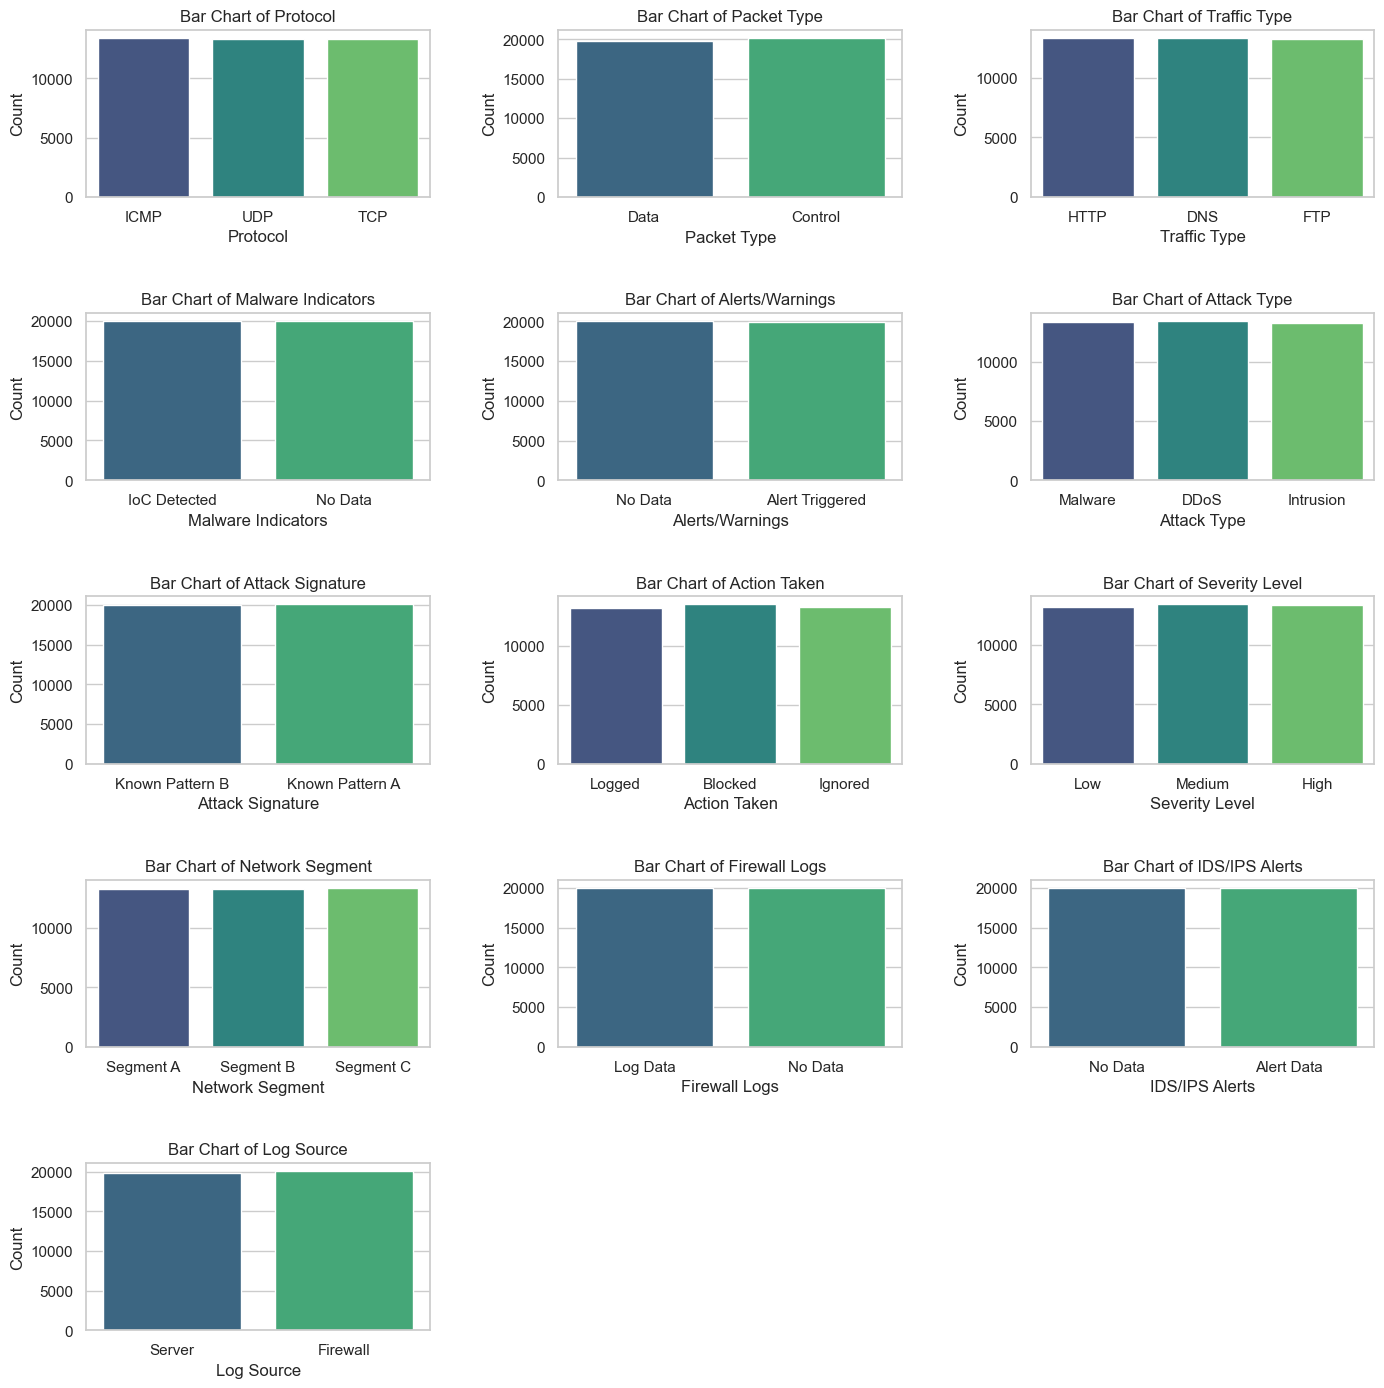

In [127]:
# Draw bar plot in each numeric columns
bar_char_columns = [col for col in data.columns if data[col].nunique() < 25 and (data[col].dtype in ["object", "int64", "float64"])]
print(f"List of columns are going to be drawn:")
print(bar_char_columns)

# Set theme for Seaborn charts
sns.set_theme(style="whitegrid")

# Determine the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(bar_char_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.tight_layout(pad=5.0)  # Adjust the padding between subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each bar chart in a subplot
for i, col in enumerate(bar_char_columns):
    sns.countplot(x=data[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Bar Chart of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

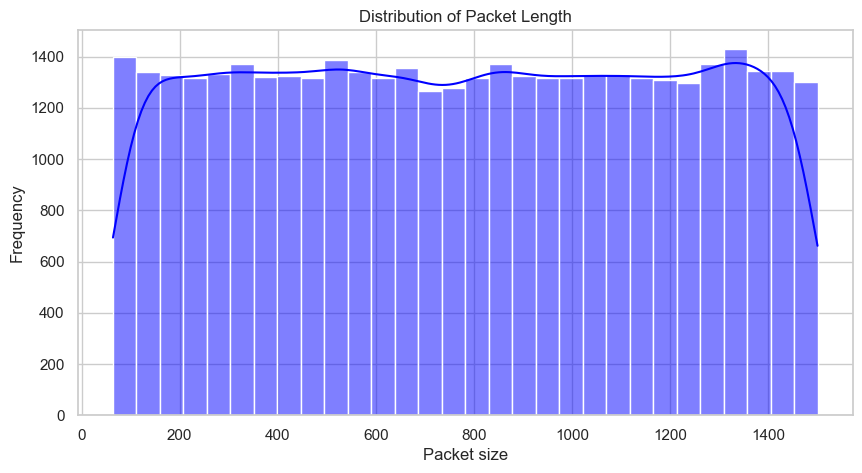

In [128]:
# Histplot for "Packet Length"
plt.figure(figsize=(10,5))
ax1 = sns.histplot(data= data["Packet Length"], bins= 30, kde = True, color= "blue")
ax1.set_title("Distribution of Packet Length")
ax1.set_xlabel("Packet size")
ax1.set_ylabel("Frequency")
plt.show()


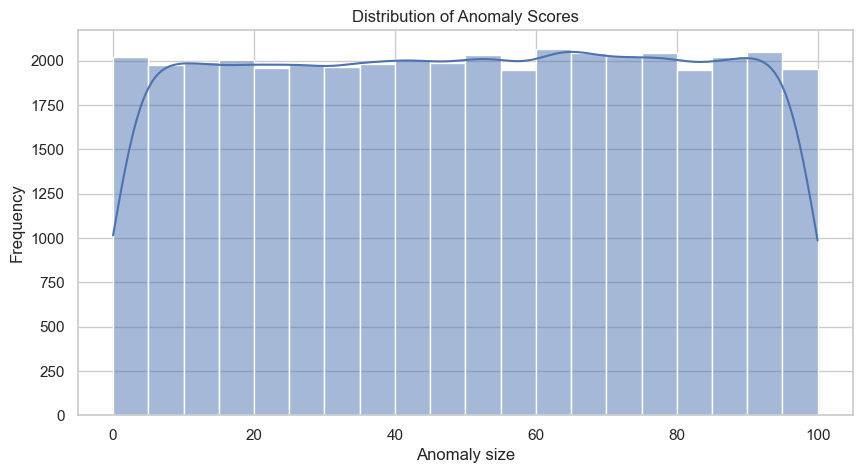

In [129]:
# Histplot for "Packet Length"
plt.figure(figsize=(10,5))
ax1 = sns.histplot(data= data["Anomaly Scores"], bins= 20, kde = True)
ax1.set_title("Distribution of Anomaly Scores")
ax1.set_xlabel("Anomaly size")
ax1.set_ylabel("Frequency")
plt.show()

/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/1650642601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_counts.values, y=geo_counts.index, palette="coolwarm")


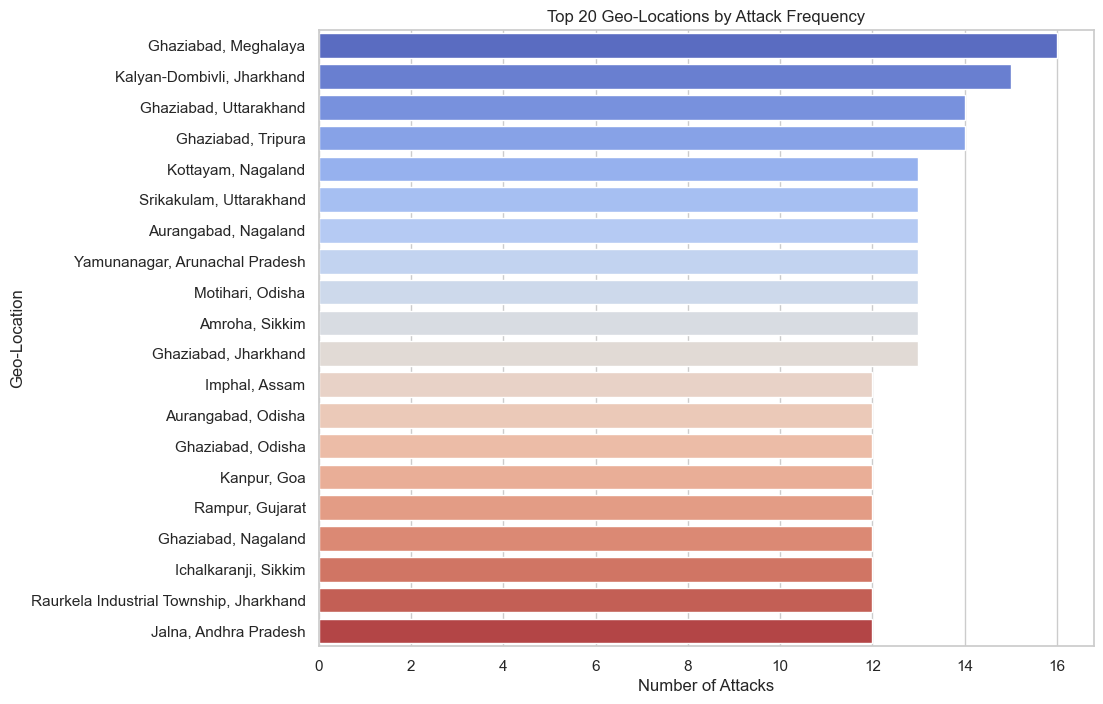

In [130]:
# Plotting the frequency of attacks by geo-location
geo_counts = data['Geo-location Data'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=geo_counts.values, y=geo_counts.index, palette="coolwarm")
plt.title('Top 20 Geo-Locations by Attack Frequency')
plt.xlabel('Number of Attacks')
plt.ylabel('Geo-Location')
plt.show()


The numeric columns to calculate correlation are: 
 Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
       'Hour', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')


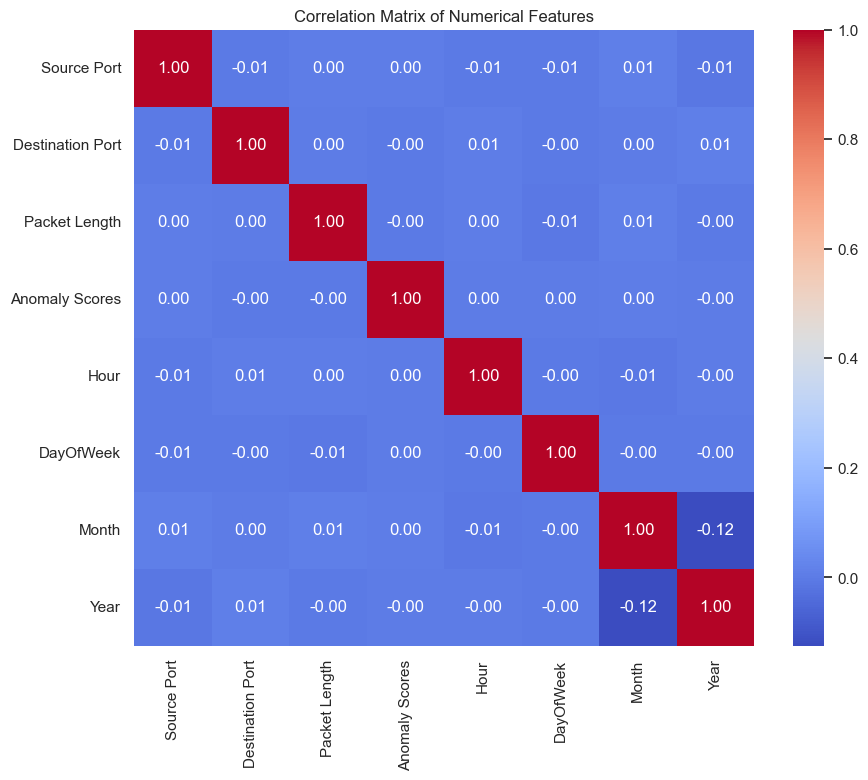

In [131]:
# Plot correlation matrix
numeric_columns = data.select_dtypes(include=["number"])
print(f"The numeric columns to calculate correlation are: \n {numeric_columns.columns}")
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm", fmt= ".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Linear Independence: The weak correlations imply that the variables are largely linearly independent of each other.
This means that changes in one variable are generally not associated with predictable linear changes in the others.

In [132]:
# Check the frequency of other attributes
other_numeric_columns = ["Source IP Address ", "Destination IP Address","Source Port", "Destination Port" ]
top_source_ips = data['Source IP Address'].value_counts().max()
top_destination_ips = data['Destination IP Address'].value_counts().max()
top_Source_Port = data['Source Port'].value_counts().max()
top_Destination_Port = data['Destination Port'].value_counts().max()
top_Geographic_attack = data["Geo-location Data"].value_counts().max()
print(top_Geographic_attack)
print(top_source_ips)
print(top_destination_ips)
print(top_Source_Port)
print(top_Destination_Port)
print("The value spreads evenly, there is no significant frequency than others")

16
1
1
6
6
The value spreads evenly, there is no significant frequency than others


Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

The severity level group by Network Segment:
Severity level in numeric     1     2     3
Network Segment                            
Segment A                  4295  4534  4444
Segment B                  4463  4441  4415
Segment C                  4425  4460  4523


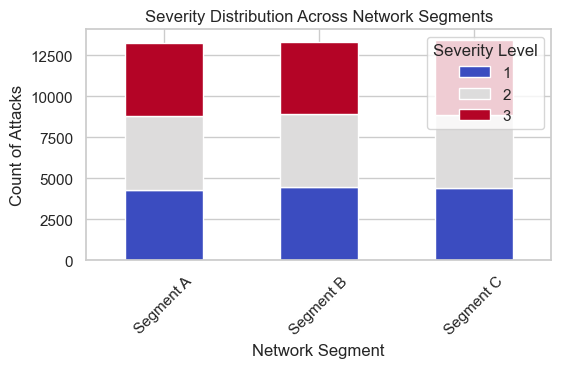

In [133]:
# tranfrom "Severity Level" to numeric value
severity_mapping = {"Low" : 1, "Medium" : 2, "High" : 3}
data["Severity level in numeric"] = data["Severity Level"].map(severity_mapping)

# Count the "Network Segment"
print(data["Network Segment"].value_counts())
print()
# Group the "Network Segment" attribute and count "Severity Level"  to check a network segment may suffer higher level of severity
segment_severity = data.groupby("Network Segment")["Severity level in numeric"].value_counts().unstack()
print("The severity level group by Network Segment:")
print(segment_severity)

# Visualize
segment_severity.plot(kind= "bar", stacked= True, colormap="coolwarm", figsize=(6,3))
plt.title('Severity Distribution Across Network Segments')
plt.xlabel('Network Segment')
plt.ylabel('Count of Attacks')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()


It shows that the severity level spreads out evenly in each network segment

Count the Attack Type: 
 Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

Distribute of severity level based on Attack Type: 
 Severity level in numeric     1     2     3
Attack Type                                
DDoS                       4450  4455  4523
Intrusion                  4374  4464  4427
Malware                    4359  4516  4432


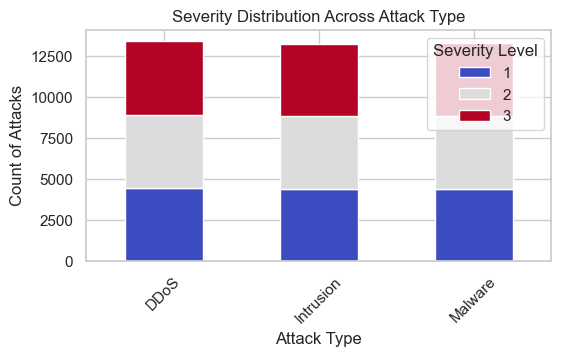

In [134]:
# Count the "Attack Type"
print("Count the Attack Type: \n",data["Attack Type"].value_counts())
print()

# Group the "Attack Type" attribute and count "Severity Level"  to check a network segment may suffer higher level of severity
attack_type_severity = data.groupby("Attack Type")["Severity level in numeric"].value_counts().unstack()
print("Distribute of severity level based on Attack Type: \n",attack_type_severity)

# Visualize
attack_type_severity.plot(kind= "bar", stacked= True, colormap="coolwarm", figsize=(6,3))
plt.title('Severity Distribution Across Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count of Attacks')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

Count the Alerts/Warnings: 
 Alerts/Warnings
No Data            20067
Alert Triggered    19933
Name: count, dtype: int64

Severity Distribution Across Alerts/Warnings: 
 Severity level in numeric     1     2     3
Alerts/Warnings                            
Alert Triggered            6569  6682  6682
No Data                    6614  6753  6700


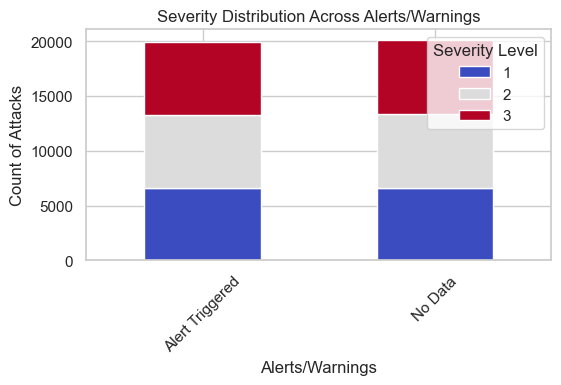

In [135]:
# Count the "Alerts/Warnings"
print("Count the Alerts/Warnings: \n",data["Alerts/Warnings"].value_counts())
print()
# Group the "Alerts/Warnings" attribute and count "Severity Level"  to check a network segment may suffer higher level of severity
attack_type_severity = data.groupby("Alerts/Warnings")["Severity level in numeric"].value_counts().unstack()
print("Severity Distribution Across Alerts/Warnings: \n", attack_type_severity)

# Visualize
attack_type_severity.plot(kind= "bar", stacked= True, colormap="coolwarm", figsize=(6,3))
plt.title('Severity Distribution Across Alerts/Warnings')
plt.xlabel('Alerts/Warnings')
plt.ylabel('Count of Attacks')
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

Average 'Packet Lenght' and Severity level: 
   Severity Level  Packet Length
0           High     780.828576
1            Low     779.920504
2         Medium     783.577894

Average 'Packet Lenght' and Attack Type: 
   Attack Type  Packet Length
0        DDoS     785.348749
1   Intrusion     780.924387
2     Malware     778.047945


/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/1569311508.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= packet_lengh_attack_type, x= "Attack Type", y = "Packet Length", palette="coolwarm")


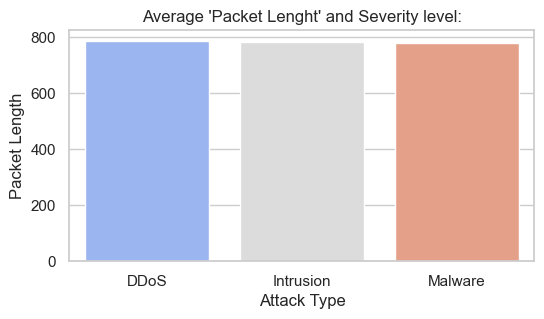

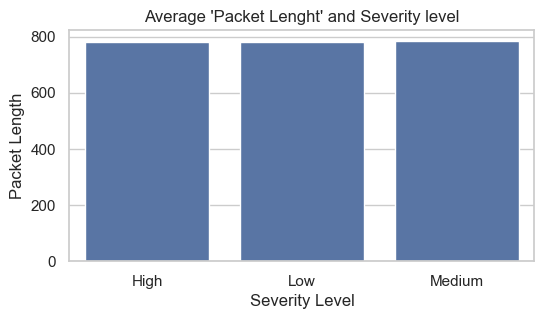

In [136]:
packet_lengh_severity_level = data.groupby("Severity Level")["Packet Length"].mean().reset_index()
print("Average 'Packet Lenght' and Severity level: \n",packet_lengh_severity_level)
print()
packet_lengh_attack_type = data.groupby("Attack Type")["Packet Length"].mean().reset_index()
print("Average 'Packet Lenght' and Attack Type: \n",packet_lengh_attack_type)
# Visualize
plt.figure(figsize=(6,3))
sns.barplot(data= packet_lengh_attack_type, x= "Attack Type", y = "Packet Length", palette="coolwarm")
plt.title("Average 'Packet Lenght' and Severity level:")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(data = packet_lengh_severity_level, x = "Severity Level", y = "Packet Length")
plt.title("Average 'Packet Lenght' and Severity level")
plt.show()


Alert is triggered by the same frequency accross different type of severity level.

In [137]:
data.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year,Severity level in numeric
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023,1
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,No Data,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Data,Log Data,No Data,Firewall,7,2,8,2020,1
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,11,2022,1


Cross-tabulation: Protocol vs. Attack Type: 
 Attack Type  DDoS  Intrusion  Malware
Protocol                             
ICMP         4508       4460     4461
TCP          4438       4397     4437
UDP          4482       4408     4409

Cross-tabulation: Traffic Type vs. Attack Type: 
 Attack Type   DDoS  Intrusion  Malware
Traffic Type                          
DNS           4528       4426     4422
FTP           4389       4453     4422
HTTP          4511       4386     4463

Cross-tabulation: Protocol vs. Severity Level: 
 Severity Level  High   Low  Medium
Protocol                          
ICMP            4455  4505    4469
TCP             4472  4386    4414
UDP             4455  4292    4552

Traffic Type vs. Severity Level: 
 Severity Level  High   Low  Medium
Traffic Type                      
DNS             4484  4446    4446
FTP             4424  4340    4500
HTTP            4474  4397    4489



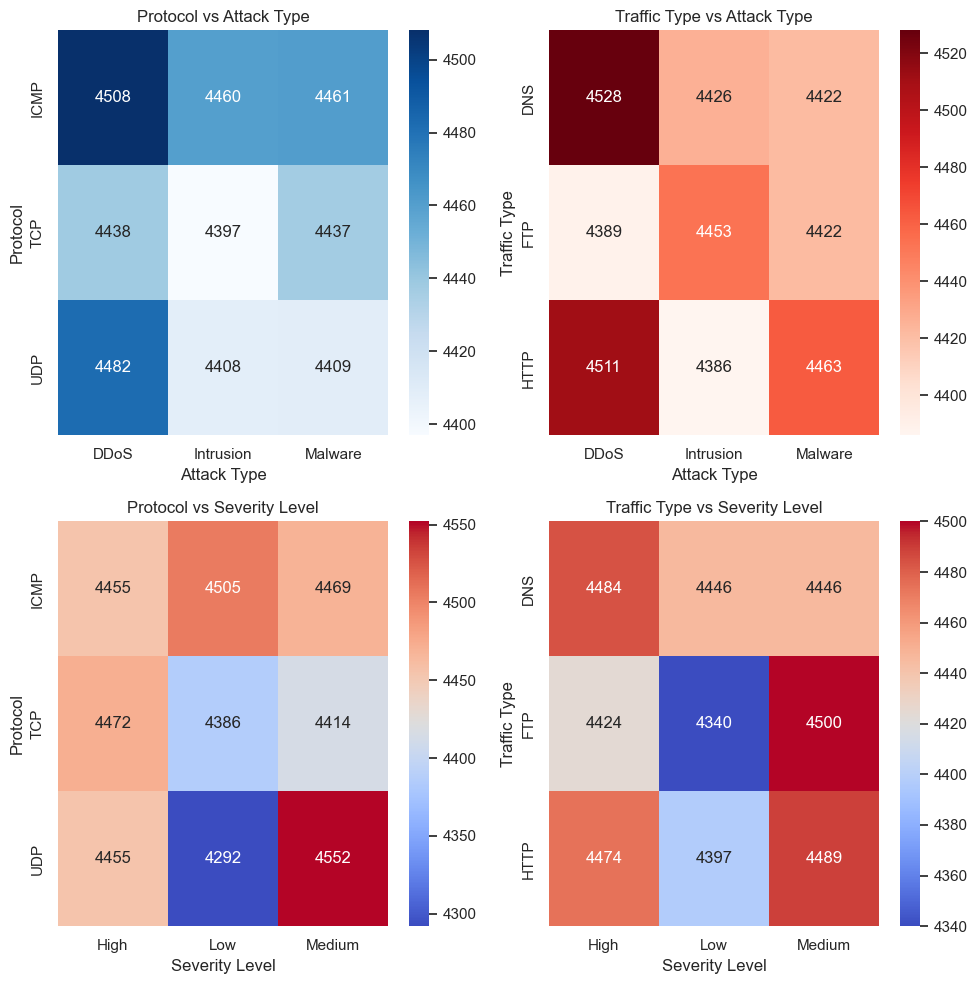

In [138]:
# Cross-tabulation: Protocol vs. Attack Type
protocol_attack_crosstab = pd.crosstab(data['Protocol'], data['Attack Type'])
print("Cross-tabulation: Protocol vs. Attack Type: \n",protocol_attack_crosstab)
print()


# Cross-tabulation: Traffic Type vs. Attack Type
traffic_attack_crosstab = pd.crosstab(data['Traffic Type'], data['Attack Type'])
print("Cross-tabulation: Traffic Type vs. Attack Type: \n",traffic_attack_crosstab)
print()


# Cross-tabulation: Protocol vs. Severity Level
protocol_severity_crosstab = pd.crosstab(data['Protocol'], data['Severity Level'])
print("Cross-tabulation: Protocol vs. Severity Level: \n",protocol_severity_crosstab)
print()
# Cross-tabulation: Traffic Type vs. Severity Level
traffic_severity_crosstab = pd.crosstab(data['Traffic Type'], data['Severity Level'])
print("Traffic Type vs. Severity Level: \n",traffic_severity_crosstab)
print()
# Visualization: Heatmaps to detect patterns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Protocol vs Attack Type
sns.heatmap(protocol_attack_crosstab, cmap="Blues", annot=True, fmt='d', ax=axes[0, 0])
axes[0, 0].set_title("Protocol vs Attack Type")

# Traffic Type vs Attack Type
sns.heatmap(traffic_attack_crosstab, cmap="Reds", annot=True, fmt='d', ax=axes[0, 1])
axes[0, 1].set_title("Traffic Type vs Attack Type")

# Protocol vs Severity Level
sns.heatmap(protocol_severity_crosstab, cmap="coolwarm", annot=True,fmt='d', ax=axes[1, 0])
axes[1, 0].set_title("Protocol vs Severity Level")

# Traffic Type vs Severity Level
sns.heatmap(traffic_severity_crosstab, cmap="coolwarm", annot=True,fmt='d', ax=axes[1, 1])
axes[1, 1].set_title("Traffic Type vs Severity Level")

plt.tight_layout()
plt.show()



From the heatmaps, it appears that there is no strong correlation between Protocol, Traffic Type, Attack Type, and Severity Level because:

Values are very close to each other, meaning no significant difference across categories.
Lack of distinct patterns, the numbers seem randomly distributed.

## 4. Feature Engineering

In [139]:
data.head(1)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year,Severity level in numeric
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023,1


In [140]:
# Create a new column named "Browser" by extracting from columns "Device Information"
data["Browser"] = data["Device Information"].str.split("/").str[0]
data["Browser"].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

In [141]:
# Function to extract OS type
def extract_os(user_agent):
    user_agent = user_agent.lower()
    if "windows" in user_agent:
        return "Windows"
    elif "mac os" in user_agent or "macintosh" in user_agent:
        return "MacOS"
    elif "linux" in user_agent:
        return "Linux"
    elif "android" in user_agent:
        return "Android"
    elif "iphone" in user_agent or "ipad" in user_agent:
        return "iOS"
    else:
        return "Other"

# Apply functions to extract Browser & OS
data['Operating System'] = data['Device Information'].apply(extract_os)
print(data['Operating System'].isna().sum()) # Check whether there is missing in extracting
print(data["Operating System"].value_counts())


0
Operating System
Windows    17953
MacOS      11587
Linux       8840
Android     1620
Name: count, dtype: int64


In [142]:
data.head(2)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year,Severity level in numeric,Browser,Operating System
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023,1,Mozilla,Windows
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,No Data,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Data,Log Data,No Data,Firewall,7,2,8,2020,1,Mozilla,Windows


In [143]:
print(data.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year', 'Severity level in numeric',
       'Browser', 'Operating System'],
      dtype='object')


Distribution of Source Port by Operating System
  Operating System  Source Port
0          Android         1620
1            Linux         8840
2            MacOS        11587
3          Windows        17953

Distribution of Destination Port by Operating System
  Operating System  Destination Port
0          Android              1620
1            Linux              8840
2            MacOS             11587
3          Windows             17953

Distribution of Protocol by Operating System
  Operating System  Protocol
0          Android      1620
1            Linux      8840
2            MacOS     11587
3          Windows     17953

Distribution of Packet Type by Operating System
  Operating System  Packet Type
0          Android         1620
1            Linux         8840
2            MacOS        11587
3          Windows        17953

Distribution of Traffic Type by Operating System
  Operating System  Traffic Type
0          Android          1620
1            Linux          8840
2   

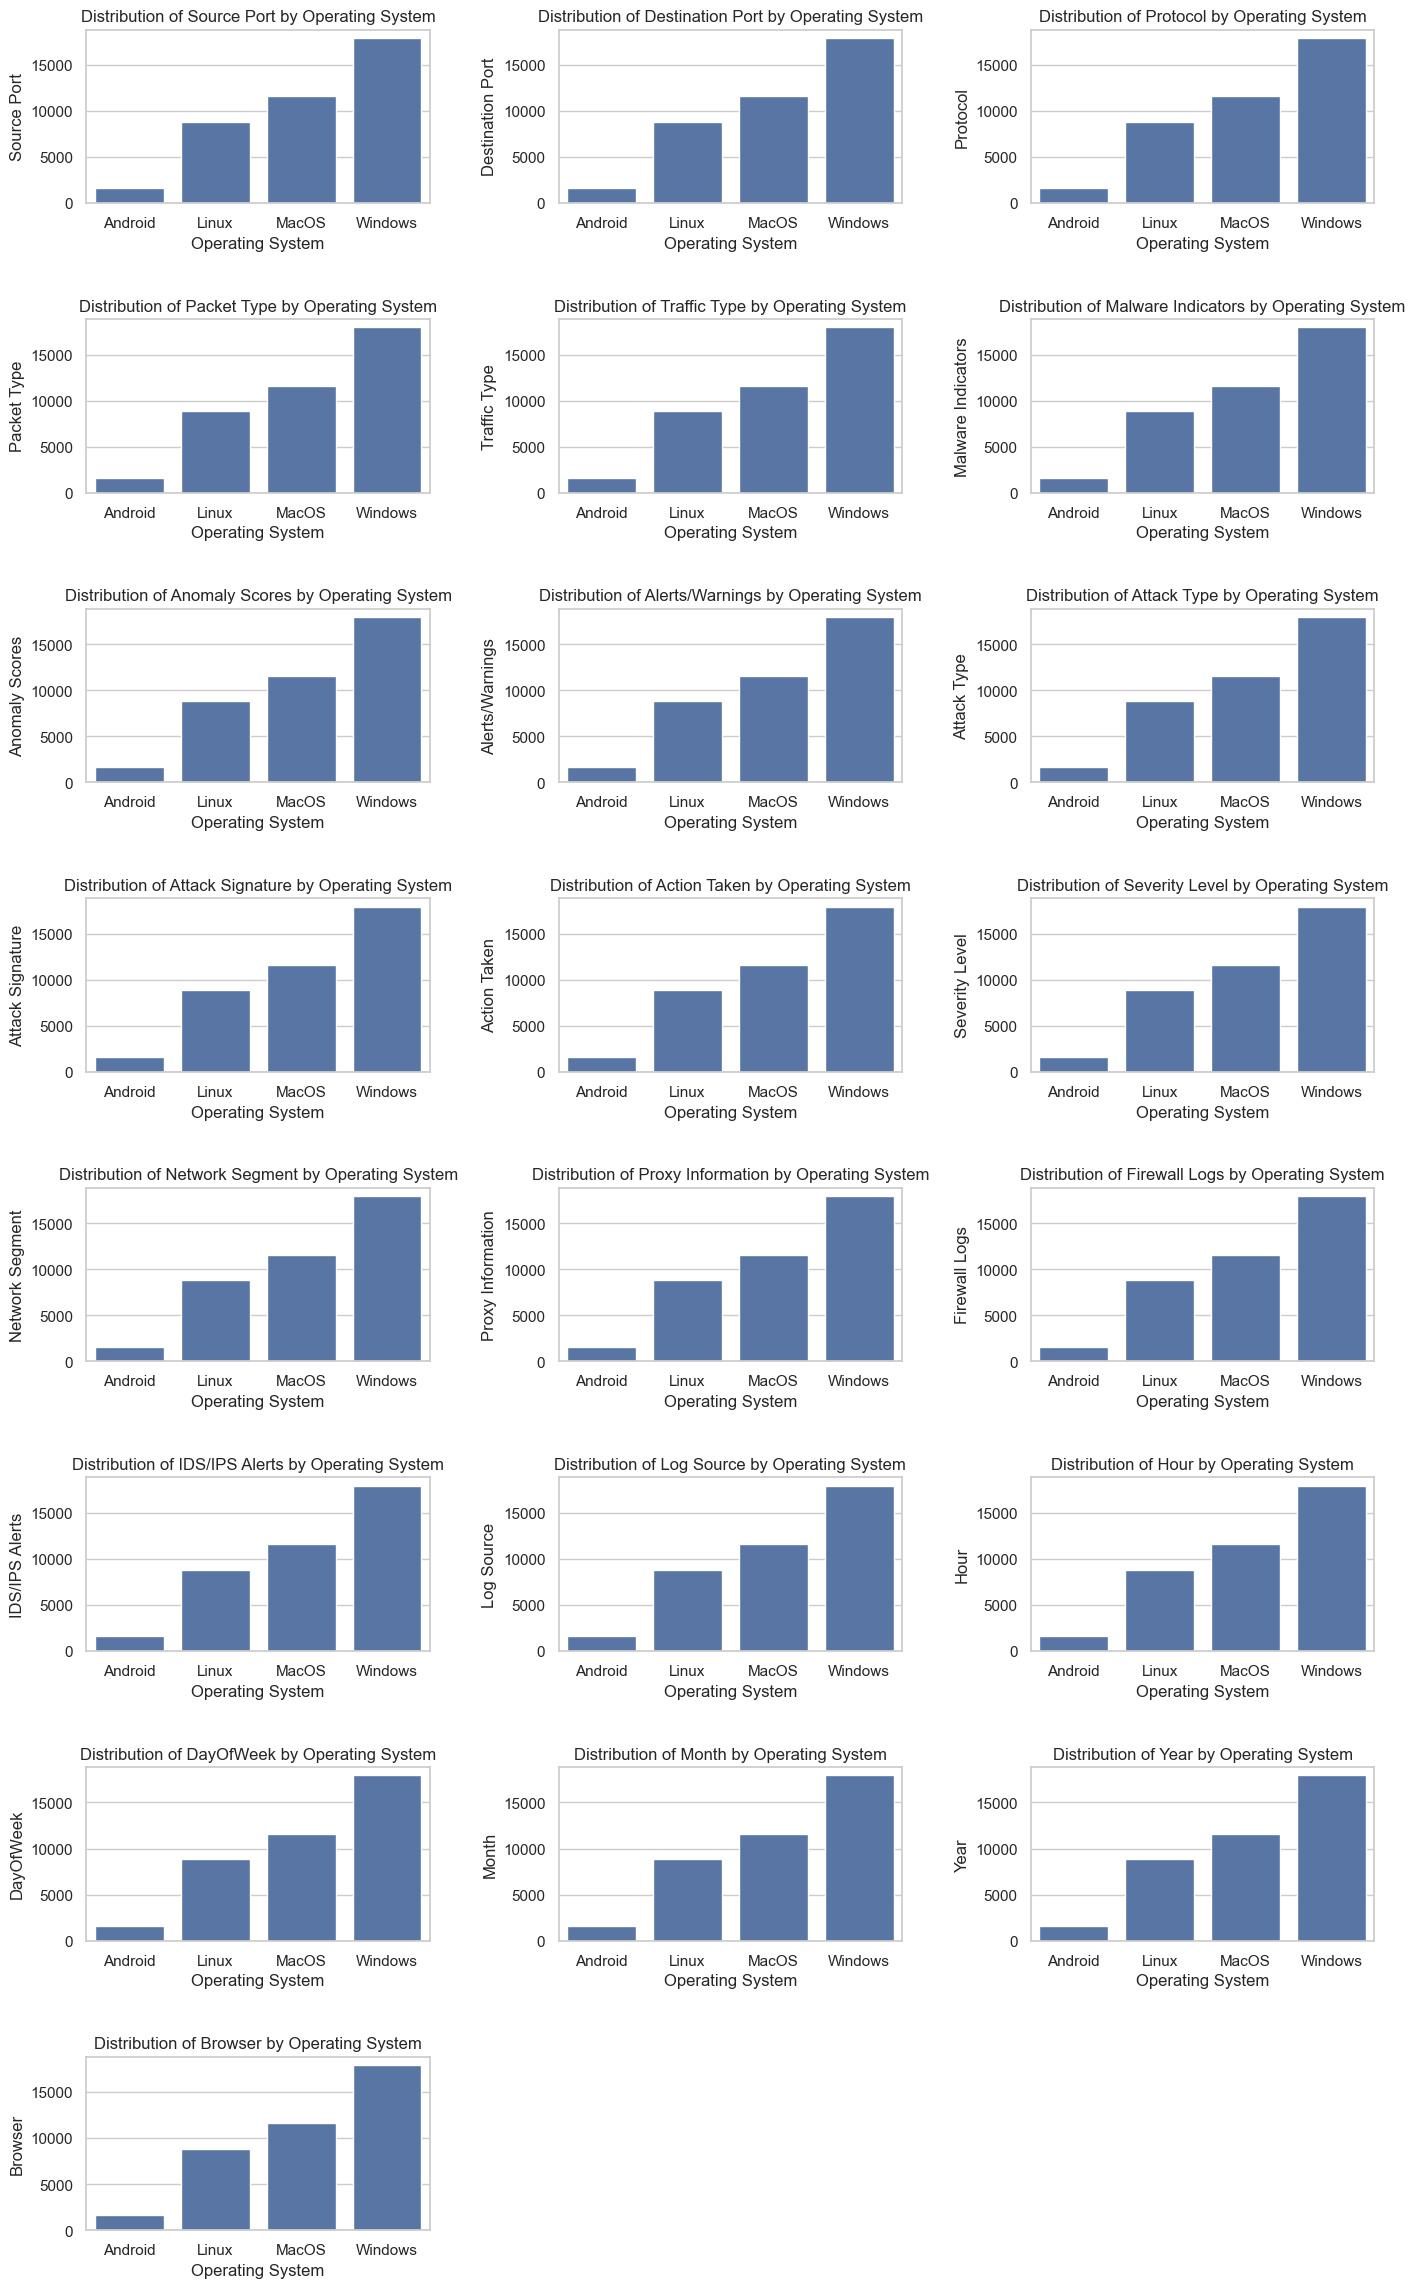

In [144]:
# Define the list of column names to analyze and visualize
columns_name = ['Source Port', 'Destination Port', 'Protocol',
       'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level',
       'Network Segment',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year','Browser']

# Define the number of columns for the subplot grid
num_cols = 3  # Number of subplots per row

# Calculate the number of required rows dynamically based on the number of columns
num_rows = (len(columns_name) + num_cols - 1) // num_cols  # Ensures enough rows to fit all subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Adjust the layout to prevent overlapping
fig.tight_layout(pad=5.0)

# Flatten the subplot axes array for easy iteration (since plt.subplots() returns a 2D array)
axes = axes.flatten()

# Iterate over each column in "columns_name" and group data by "Operating System"
for i1, col in enumerate(columns_name):
    print(f"Distribution of {col} by Operating System")  # Print column name for reference
    
    # Group by "Operating System" and count occurrences of each value in the current column
    i = data.groupby("Operating System")[col].count().reset_index()
    
    # Print the aggregated data for reference
    print(i)
    
    # Create a bar plot of the distribution of the column grouped by "Operating System"
    sns.barplot(data=i, x="Operating System", y=col, ax=axes[i1])
    
    # Set title for the current subplot
    axes[i1].set_title(f"Distribution of {col} by Operating System")

    print()  # Add a blank line for better console readability

# Hide any unused subplots if the total number of columns is not a multiple of num_cols
for j in range(i1 + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra empty subplots

# Display the plots
plt.show()


Windows has the highest activity across all attributes.<br>
Windows has the highest risk exposure.<br>
More network interactions, more malware detections, and more alerts, etc. indicate that Windows systems are the most active and targeted.


Distribution of Source Port by Browser
   Browser  Source Port
0  Mozilla        31951
1    Opera         8049

Distribution of Destination Port by Browser
   Browser  Destination Port
0  Mozilla             31951
1    Opera              8049

Distribution of Protocol by Browser
   Browser  Protocol
0  Mozilla     31951
1    Opera      8049

Distribution of Packet Type by Browser
   Browser  Packet Type
0  Mozilla        31951
1    Opera         8049

Distribution of Traffic Type by Browser
   Browser  Traffic Type
0  Mozilla         31951
1    Opera          8049

Distribution of Malware Indicators by Browser
   Browser  Malware Indicators
0  Mozilla               31951
1    Opera                8049

Distribution of Anomaly Scores by Browser
   Browser  Anomaly Scores
0  Mozilla           31951
1    Opera            8049

Distribution of Alerts/Warnings by Browser
   Browser  Alerts/Warnings
0  Mozilla            31951
1    Opera             8049

Distribution of Attack Type by Brows

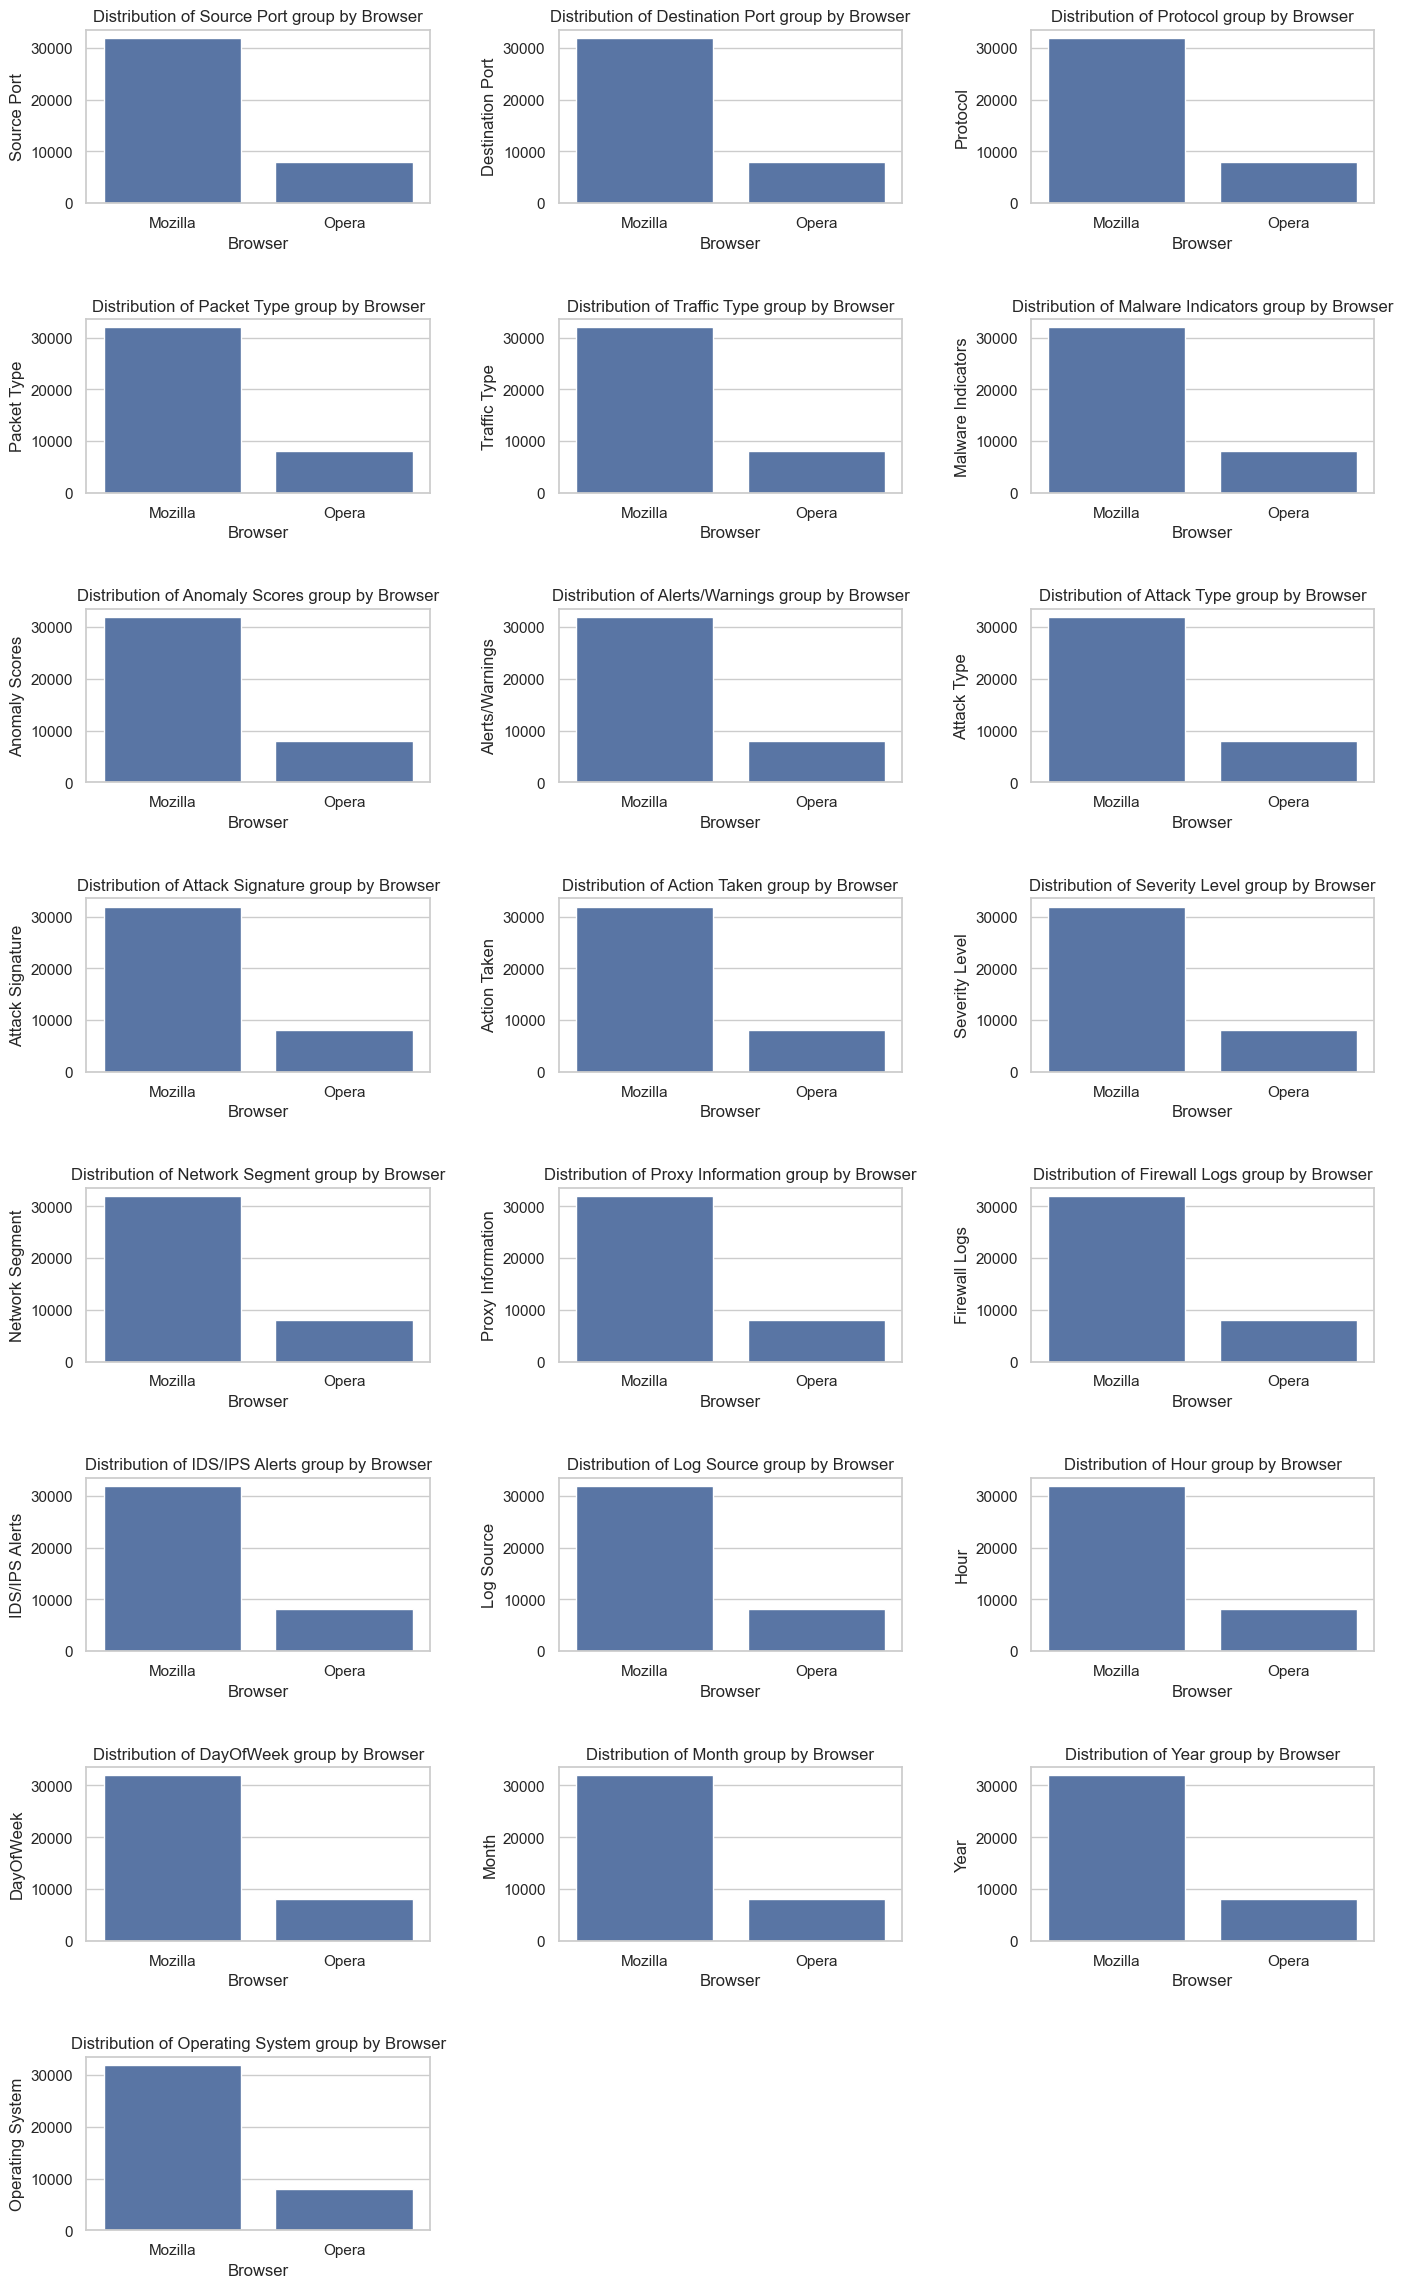

In [145]:
# Group by "Browser " and count occurrences of each value in the current column
# Define the list of column names to analyze and visualize
columns_name = ['Source Port', 'Destination Port', 'Protocol',
       'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level',
       'Network Segment',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year','Operating System']

# Define the number of columns for the subplot grid
num_cols = 3  # Number of subplots per row

# Calculate the number of required rows dynamically based on the number of columns
num_rows = (len(columns_name) + num_cols - 1) // num_cols  # Ensures enough rows to fit all subplots

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Adjust the layout to prevent overlapping
fig.tight_layout(pad=5.0)

# Flatten the subplot axes array for easy iteration (since plt.subplots() returns a 2D array)
axes = axes.flatten()

# Iterate over each column in "columns_name" and group data by "Browser"
for i1, col in enumerate(columns_name):
    print(f"Distribution of {col} by Browser")  # Print column name for reference
    
    # Group by "Browser " and count occurrences of each value in the current column
    i = data.groupby("Browser")[col].count().reset_index()
    
    # Print the aggregated data for reference
    print(i)
    
    # Create a bar plot of the distribution of the column grouped by "Browser"
    sns.barplot(data=i, x="Browser", y=col, ax=axes[i1])
    
    # Set title for the current subplot
    axes[i1].set_title(f"Distribution of {col} group by Browser")

    print()  # Add a blank line for better console readability

# Hide any unused subplots if the total number of columns is not a multiple of num_cols
for j in range(i1 + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra empty subplots

# Display the plots
plt.show()


Mozilla has the highest activity across all attributes.<br>
Mozilla has the highest risk exposure.<br>
More network interactions, more malware detections, and more alerts, etc. indicate that Windows systems are the most active and targeted.


In [146]:

# Creating new features
private_ip_ranges = [10, 172, 192]
data['Is Source Private'] = data['Source IP Address'].apply(lambda x: int(x.split('.')[0]) in private_ip_ranges)
data['Is Destination Private'] = data['Destination IP Address'].apply(lambda x: int(x.split('.')[0]) in private_ip_ranges)
print("Count Is Source Private: \n",data["Is Source Private"].value_counts())
print()
print("Count Is Destination Private: \n", data["Is Destination Private"].value_counts())




Count Is Source Private: 
 Is Source Private
False    39475
True       525
Name: count, dtype: int64

Count Is Destination Private: 
 Is Destination Private
False    39514
True       486
Name: count, dtype: int64


In [147]:
# Convert ports to categorical types
def categorize_port(port):
    if port <= 1023:
        return "Well-known"
    elif port <= 49151:
        return "Registered"
    else:
        return "Dynamic"

data['Source Port Category'] = data['Source Port'].apply(categorize_port)
data['Destination Port Category'] = data['Destination Port'].apply(categorize_port)

# Convert categories to numbers
data['Source Port Category'] = LabelEncoder().fit_transform(data['Source Port Category'])
data['Destination Port Category'] = LabelEncoder().fit_transform(data['Destination Port Category'])

# Create new time-based features
data['Is Night Traffic'] = (data['Hour'] >= 18) | (data['Hour'] <= 6)
data['Is Weekend'] = data['DayOfWeek'].isin([6, 7]).astype(int)


In [148]:
data

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,Month,Year,Severity level in numeric,Browser,Operating System,Is Source Private,Is Destination Private,Source Port Category,Destination Port Category,Is Night Traffic,Is Weekend
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,No Data,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,6,1,5,2023,1,Mozilla,Windows,False,False,1,1,True,0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,No Data,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Data,Log Data,No Data,Firewall,7,2,8,2020,1,Mozilla,Windows,False,False,1,1,False,0
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,8,6,11,2022,1,Mozilla,Windows,False,False,1,0,False,1
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,No Data,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",No Data,No Data,Alert Data,Firewall,10,6,7,2023,2,Mozilla,MacOS,False,False,1,1,False,1
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,No Data,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,No Data,Alert Data,Firewall,13,6,7,2023,1,Mozilla,Windows,False,False,1,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,IoC Detected,39.28,No Data,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",No Data,Log Data,Alert Data,Firewall,14,4,5,2023,2,Mozilla,MacOS,False,False,1,1,False,0
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,IoC Detected,27.25,No Data,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,No Data,Firewall,0,0,3,2023,3,Mozilla,Windows,False,False,1,1,True,0
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,IoC Detected,31.01,No Data,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",No Data,Log Data,Alert Data,Server,1,3,3,2022,1,Mozilla,Windows,False,False,1,1,True,0
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5

In [149]:
data.to_csv("EDA_Cybersecurity_Attack.csv")

## 5. Machine Learning Model (XGBoost)

In [150]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder



In [151]:
data.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year', 'Severity level in numeric',
       'Browser', 'Operating System', 'Is Source Private',
       'Is Destination Private', 'Source Port Category',
       'Destination Port Category', 'Is Night Traffic', 'Is Weekend'],
      dtype='object')

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  40000 non-null  datetime64[ns]
 1   Source IP Address          40000 non-null  object        
 2   Destination IP Address     40000 non-null  object        
 3   Source Port                40000 non-null  int64         
 4   Destination Port           40000 non-null  int64         
 5   Protocol                   40000 non-null  object        
 6   Packet Length              40000 non-null  int64         
 7   Packet Type                40000 non-null  object        
 8   Traffic Type               40000 non-null  object        
 9   Payload Data               40000 non-null  object        
 10  Malware Indicators         40000 non-null  object        
 11  Anomaly Scores             40000 non-null  float64       
 12  Aler

In [153]:
selected_features = [
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Signature',
       'Action Taken',
       'Network Segment',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year', 'Severity level in numeric',
       'Browser', 'Operating System', 'Is Source Private',
       'Is Destination Private']
# Target variable
target = "Attack Type"
# Ensure only selected feature are used
X = data[selected_features]
y= data[target]

# Convert categorical features to 'category' dtype for XGBoost
categorical_cols = ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 'Network Segment',
                    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Operating System','Browser']

for col in categorical_cols:
    if col in X.columns:
        X[col] = X[col].astype("category")

print(X.info()) # Check if conversion is sucessfully


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Source Port                40000 non-null  int64   
 1   Destination Port           40000 non-null  int64   
 2   Protocol                   40000 non-null  category
 3   Packet Length              40000 non-null  int64   
 4   Packet Type                40000 non-null  category
 5   Traffic Type               40000 non-null  category
 6   Malware Indicators         40000 non-null  category
 7   Anomaly Scores             40000 non-null  float64 
 8   Alerts/Warnings            40000 non-null  category
 9   Attack Signature           40000 non-null  category
 10  Action Taken               40000 non-null  category
 11  Network Segment            40000 non-null  category
 12  Firewall Logs              40000 non-null  category
 13  IDS/IPS Alerts             4000

/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/138796984.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype("category")
/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/138796984.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype("category")
/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/138796984.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [154]:
# Convert target variable to numeric labels
y = y.astype("category").cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 22, stratify= y)


In [155]:

#  Define Hyperparameter Grid for Tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 6, 9],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for updating trees
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction needed to make a split
    'reg_lambda': [0, 1, 10]  # L2 regularization (prevents overfitting)
}


In [156]:

# Initialize and Train the XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective = "multi:softmax",
    num_class = len(y.unique()),
    eval_metric = "mlogloss",
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    tree_method = "hist",
    enable_categorical = True,
    random_state = 42
)


In [157]:

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=1  # Use all available CPUs
)


In [158]:

print("\n Running Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)



 Running Randomized Search for Hyperparameter Tuning...


KeyboardInterrupt: 

In [44]:

#  Train XGBoost Model with Best Parameters
best_params = random_search.best_params_
print("\n Best Hyperparameters Found:", best_params)



 Best Hyperparameters Found: {'subsample': 0.7, 'reg_lambda': 1, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


In [45]:

xgb_model_optimized = xgb.XGBClassifier(
    **best_params,
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    enable_categorical=True,
    random_state=42
)

print("\ Training Optimized XGBoost Model...")
xgb_model_optimized.fit(X_train, y_train)


\ Training Optimized XGBoost Model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [46]:

#Model Evaluation
y_pred = xgb_model_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print Model Performance
print("\n Optimized Model Evaluation Metrics:")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")


 Optimized Model Evaluation Metrics:
 Accuracy: 0.3344
 Precision: 0.3343
Recall: 0.3344
 F1-Score: 0.3343


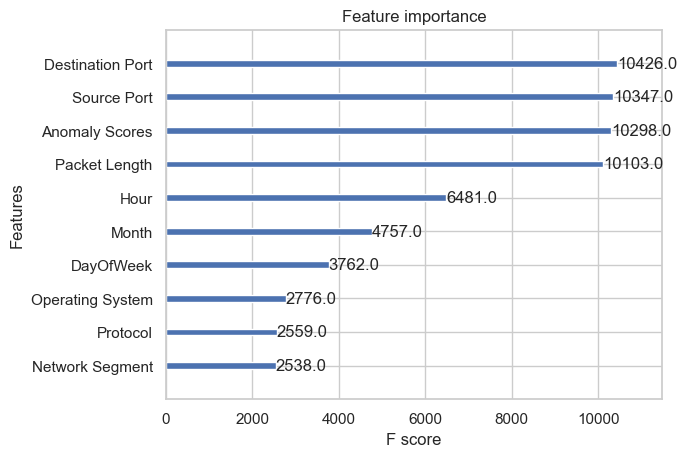

In [47]:
xgb.plot_importance(xgb_model_optimized, max_num_features=10)
plt.show()


In [62]:
data.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Hour', 'DayOfWeek', 'Month', 'Year', 'Severity level in numeric',
       'Browser', 'Operating System', 'Is Source Private',
       'Is Destination Private', 'Source Port Category',
       'Destination Port Category', 'Is Night Traffic', 'Is Weekend'],
      dtype='object')

<>:89: SyntaxWarning: invalid escape sequence '\ '
<>:89: SyntaxWarning: invalid escape sequence '\ '
/var/folders/ch/g7n80fhs1m3b8_1l2vhzh74c0000gn/T/ipykernel_30154/3014511301.py:89: SyntaxWarning: invalid escape sequence '\ '
  print("\ Training Optimized XGBoost Model...")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Packet Length   40000 non-null  int64  
 1   Anomaly Scores  40000 non-null  float64
 2   Hour            40000 non-null  int32  
 3   DayOfWeek       40000 non-null  int32  
 4   Month           40000 non-null  int32  
dtypes: float64(1), int32(3), int64(1)
memory usage: 1.1 MB
None

 Running Randomized Search for Hyperparameter Tuning...

 Best Hyperparameters Found: {'subsample': 0.7, 'reg_lambda': 0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
\ Training Optimized XGBoost Model...

 Optimized Model Evaluation Metrics:
 Accuracy: 0.3339
 Precision: 0.3339
Recall: 0.3339
 F1-Score: 0.3339


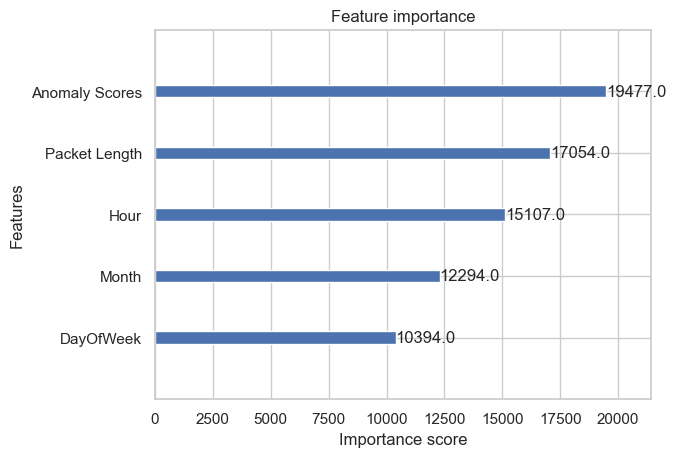

In [ ]:
selected_features = [
       'Packet Length',
       'Anomaly Scores',
       'Hour', 'DayOfWeek', 'Month',]
# Target variable
target = "Attack Type"
# Ensure only selected feature are used
X = data[selected_features]
y= data[target]

# Convert categorical features to 'category' dtype for XGBoost
categorical_cols = ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 'Network Segment',
                    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Operating System','Browser']

for col in categorical_cols:
    if col in X.columns:
        X[col] = X[col].astype("category")

print(X.info()) # Check if conversion is sucessfully

# Convert target variable to numeric labels
y = y.astype("category").cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 22, stratify= y)


#  Define Hyperparameter Grid for Tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 6, 9],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for updating trees
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction needed to make a split
    'reg_lambda': [0, 1, 10]  # L2 regularization (prevents overfitting)
}



# Initialize and Train the XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective = "multi:softmax",
    num_class = len(y.unique()),
    eval_metric = "mlogloss",
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    tree_method = "hist",
    enable_categorical = True,
    random_state = 42
)



random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=1  # Use all available CPUs
)



print("\n Running Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)


#  Train XGBoost Model with Best Parameters
best_params = random_search.best_params_
print("\n Best Hyperparameters Found:", best_params)




xgb_model_optimized = xgb.XGBClassifier(
    **best_params,
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    enable_categorical=True,
    random_state=42
)

print("\ Training Optimized XGBoost Model...")
xgb_model_optimized.fit(X_train, y_train)
    
import joblib
joblib.dump(xgb_model_optimized, "model.pkl")


#Model Evaluation
y_pred = xgb_model_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print Model Performance
print("\n Optimized Model Evaluation Metrics:")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")

xgb.plot_importance(xgb_model_optimized, max_num_features=10)
plt.show()



🔄 Training Random Forest Model...

📊 Model Evaluation Metrics:
✅ Accuracy: 0.3391

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.36      2686
           1       0.33      0.31      0.32      2653
           2       0.34      0.33      0.33      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



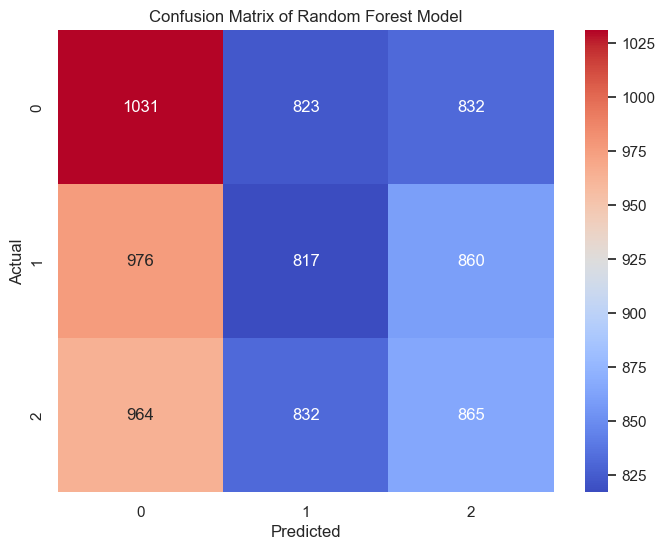

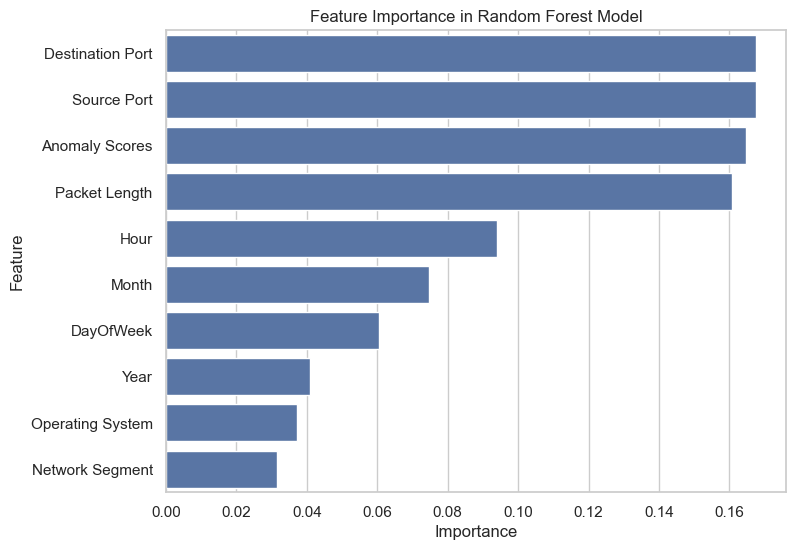

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



#: Define Selected Features
selected_features = [
    'Source Port', 'Destination Port', 'Packet Length',
    'Anomaly Scores', 'Network Segment', 'Hour', 'DayOfWeek',
    'Month', 'Year', 'Operating System'
]

# Target variable
target = 'Attack Type'

# Ensure selected features exist
X = data[selected_features].copy()
y = data[target].copy()

# ✅ Step 2: Convert Categorical Features to Numeric
categorical_cols = ['Network Segment',  'Operating System']

for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# ✅ Step 3: Convert Target Variable to Numeric Labels
y = LabelEncoder().fit_transform(y)

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 5: Initialize & Train the Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,  # Limit tree depth to prevent overfitting
    random_state=42
)

print("\n🔄 Training Random Forest Model...")
rf_model.fit(X_train, y_train)

# ✅ Step 6: Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# ✅ Step 7: Print Evaluation Metrics
print("\n📊 Model Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model")
plt.show()

# ✅ Step 9: Feature Importance Analysis
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance in Random Forest Model")
plt.show()


Epoch 1/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1201 - accuracy: 0.3377 - val_loss: 1.0997 - val_accuracy: 0.3268 - lr: 0.0100
Epoch 2/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1000 - accuracy: 0.3355 - val_loss: 1.0997 - val_accuracy: 0.3313 - lr: 0.0100
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1000 - accuracy: 0.3313 - val_loss: 1.0993 - val_accuracy: 0.3327 - lr: 0.0100
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0999 - accuracy: 0.3319 - val_loss: 1.0992 - val_accuracy: 0.3318 - lr: 0.0100
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1006 - accuracy: 0.3371 - val_loss: 1.0996 - val_accuracy: 0.3361 - lr: 0.0100
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1004 - accuracy: 0.3332 - val_loss: 1.0986 - val_accuracy: 0.3285 - lr: 0.0100
Epoch 7/200
1000/1000 [=============================

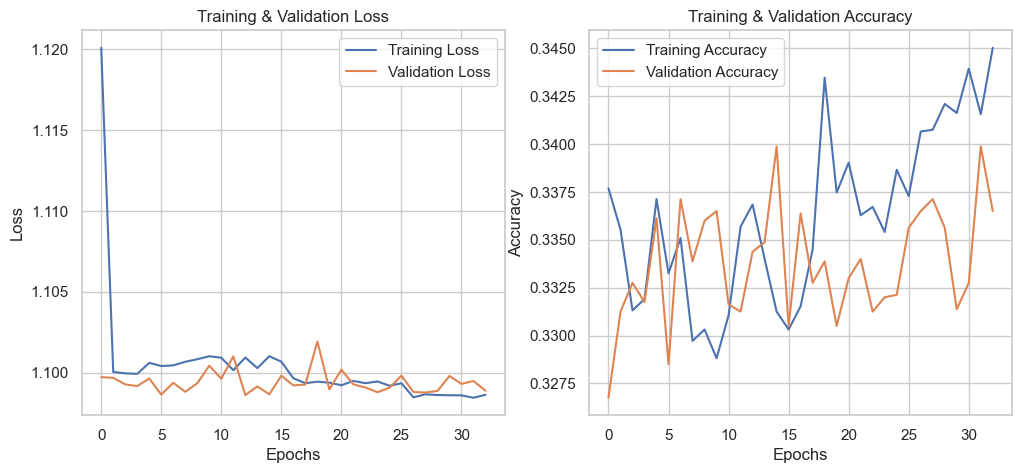

In [54]:
# ✅ Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



# ✅ Step 1: Feature Selection
selected_features = [
    'Source Port', 'Destination Port', 'Packet Length',
    'Anomaly Scores', 'Network Segment', 'Hour', 'DayOfWeek',
    'Month', 'Year', 'Operating System'
]

# Target variable
target = 'Attack Type'

# Ensure selected features exist
X = data[selected_features].copy()
y = data[target].copy()

# ✅ Step 2: Convert Categorical Features to Numeric
categorical_cols = ['Network Segment', 'DayOfWeek', 'Month', 'Year', 'Operating System']

for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# ✅ Step 3: Convert Target Variable to Numeric Labels
y = LabelEncoder().fit_transform(y)

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 6: Build Optimized Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),  # Normalize activations
    Dropout(0.3),  # Dropout to prevent overfitting
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for multi-class classification
])

# ✅ Step 7: Compile the Model with Adam Optimizer and Learning Rate Scheduler
optimizer = Adam(learning_rate=0.01)  # Initial learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 8: Define Callbacks (Early Stopping & Learning Rate Scheduler)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# ✅ Step 9: Train the Model with Callbacks
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stop, reduce_lr])

# ✅ Step 10: Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {test_accuracy:.4f}")

# ✅ Step 11: Plot Training History
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [57]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

cnn_model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test))


Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 1.0999 - accuracy: 0.3312 - val_loss: 1.0986 - val_accuracy: 0.3294
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0990 - accuracy: 0.3304 - val_loss: 1.0990 - val_accuracy: 0.3330
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0989 - accuracy: 0.3328 - val_loss: 1.0988 - val_accuracy: 0.3326
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0989 - accuracy: 0.3308 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0988 - accuracy: 0.3378 - val_loss: 1.0987 - val_accuracy: 0.3343
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0988 - accuracy: 0.3359 - val_loss: 1.0987 - val_accuracy: 0.3358
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0987 - accuracy: 0.3334 - val_loss: 1.0987 - val_ac

Epoch [1/50], Loss: 1100.3078, Test Accuracy: 0.3357
Epoch [2/50], Loss: 1099.2819, Test Accuracy: 0.3316
Epoch [3/50], Loss: 1099.1501, Test Accuracy: 0.3326
Epoch [4/50], Loss: 1099.0548, Test Accuracy: 0.3357
Epoch [5/50], Loss: 1099.1340, Test Accuracy: 0.3357
Epoch [6/50], Loss: 1099.2528, Test Accuracy: 0.3357
Epoch [7/50], Loss: 1099.2829, Test Accuracy: 0.3357
Epoch [8/50], Loss: 1099.2609, Test Accuracy: 0.3316
Epoch [9/50], Loss: 1099.1599, Test Accuracy: 0.3357
Epoch [10/50], Loss: 1099.3069, Test Accuracy: 0.3316
Epoch [11/50], Loss: 1099.2779, Test Accuracy: 0.3357
Epoch [12/50], Loss: 1099.2458, Test Accuracy: 0.3326
Epoch [13/50], Loss: 1099.3456, Test Accuracy: 0.3316
Epoch [14/50], Loss: 1099.3470, Test Accuracy: 0.3326
Epoch [15/50], Loss: 1099.3010, Test Accuracy: 0.3316
Epoch [16/50], Loss: 1099.0820, Test Accuracy: 0.3357
Epoch [17/50], Loss: 1099.4463, Test Accuracy: 0.3326
Epoch [18/50], Loss: 1099.1382, Test Accuracy: 0.3326
Epoch [19/50], Loss: 1099.4638, Test 

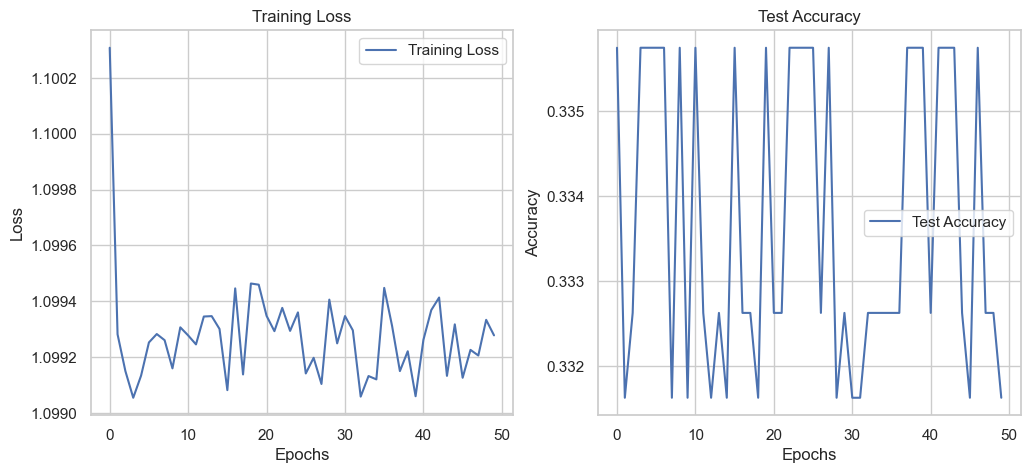

In [70]:
# ✅ Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


# ✅ Step 1: Feature Selection
selected_features = [
    'Source Port', 'Destination Port', 'Packet Length',
    'Anomaly Scores', 'Network Segment', 'Hour', 'DayOfWeek',
    'Month', 'Year', 'Operating System'
]

# Target variable
target = 'Attack Type'

# Ensure selected features exist
X = data[selected_features].copy()
y = data[target].copy()

# ✅ Step 2: Convert Categorical Features to Numeric
categorical_cols = ['Network Segment', 'DayOfWeek', 'Month', 'Year', 'Operating System']

for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# ✅ Step 3: Convert Target Variable to Numeric Labels
y = LabelEncoder().fit_transform(y)

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # FIX: Now using scaled data!
X_test_scaled = scaler.transform(X_test)

# ✅ Step 6: Convert to PyTorch Tensors with Correct Shape
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # FIX: Channels first
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ✅ Step 7: Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# ✅ Step 8: Define CNN Model in PyTorch
class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)

        # ✅ Automatically calculate `fc1` input size
        self._to_linear = None
        self._compute_linear_input(input_size)

        self.fc1 = nn.Linear(self._to_linear, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.3)

    def _compute_linear_input(self, input_size):
        """Pass a fake tensor through conv layers to determine final output size dynamically"""
        with torch.no_grad():
            x = torch.randn(1, 1, input_size)  # Fake input (batch=1, channels=1, features=input_size)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            self._to_linear = x.view(1, -1).shape[1]  # Get flattened size dynamically

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)  # Flatten before fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# ✅ Step 9: Initialize Model, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(input_size=X_train_scaled.shape[1], num_classes=len(np.unique(y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ✅ Step 10: Training Loop with Early Stopping
num_epochs = 50
train_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()  # Backpropagation
        optimizer.step()
        
        total_loss += loss.item()
    
    train_losses.append(total_loss / len(train_loader))

    # ✅ Evaluate on Test Data
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    
    test_accuracy = correct / total
    test_accuracies.append(test_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# ✅ Step 11: Final Evaluation
print(f"\n✅ Final Test Accuracy: {test_accuracy:.4f}")

# ✅ Step 12: Plot Training History
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.show()
